In [5]:
from datascience import *
import numpy as np

%matplotlib inline

# Prediction

In [2]:
galton = Table.read_table('galton.csv')
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


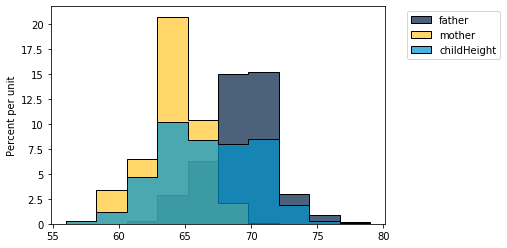

In [6]:
# Given that a father is 78.5" tall, and mother is 67" tall
# how tall will the children be?
galton.select(1,2,7).hist()

In [ ]:
# why are the father and mother bars taller?
# adults --> more dense; children --> more spread out
# genders are mixed together

In [7]:
# galton said: 'i think avg of parents height --> child height'
heights = galton.select(3,7).relabeled(0,'MidParent').relabeled(1,'Child')

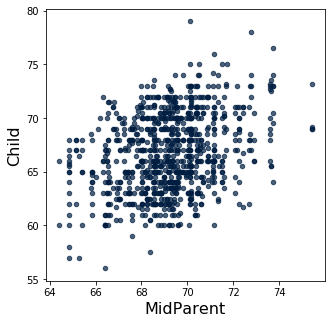

In [8]:
heights.scatter(0)

In [9]:
# what will my child height be if midparent height is 68?
# something a bit simpler than regression

close_to_68 = heights.where('MidParent',are.between(67.5,68.5))
close_to_68

MidParent,Child
68.44,62
67.94,71.2
67.94,67
68.33,62.5
68.23,73
68.23,72
68.23,69
67.98,73
67.98,71
67.98,71


In [10]:
close_to_68.column(1).mean()

66.24045801526718

In [11]:
def predict_child(mp):
    close_points = heights.where('MidParent', are.between(mp-0.5, mp+0.5))
    return close_points.column('Child').mean()

In [12]:
predict_child(70)

67.27285067873302

In [13]:
preds = heights.apply(predict_child,'MidParent')

In [14]:
heights_with_predictions = heights.with_columns(
    'Prediction',preds
)

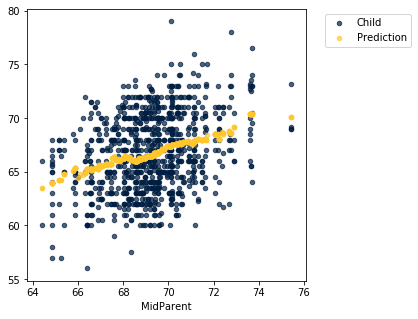

In [15]:
heights_with_predictions.scatter('MidParent')

# Combining Everything We Know

Is there a relationship between how much a team wins and how much they're paying players?

There's a CSV nba_win_loss.csv that has the wins and losses for each team.

Use that and the data analysis and visualization skills you've learned in class to determine whether $ paid corresponds to win success. What about amount paid per position? Are there positions it seems more useful to pay people more?